29-Jan-24 11:46:08: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/thg/l2/mag/frd/2015/
29-Jan-24 11:46:08: File is current: c:\work\Data\SPEDAS\themis\thg/l2/mag/frd/2015/thg_l2_mag_frd_20150622_v01.cdf
29-Jan-24 11:46:09: Time clip was applied to: thg_mag_frd


2024-01-29T11:46:09.589553-0800 | INFO | mth5.mth5 | _initialize_file | Initialized MTH5 0.2.0 file c:\work\Data\SPEDAS\mth5\4P_REU49.h5 in mode w
2024-01-29T11:46:13.869090-0800 | INFO | mth5.groups.base | _add_group | RunGroup a already exists, returning existing group.
2024-01-29T11:46:13.926047-0800 | INFO | mth5.groups.base | _add_group | RunGroup b already exists, returning existing group.
2024-01-29T11:46:13.977043-0800 | INFO | mth5.groups.base | _add_group | RunGroup d already exists, returning existing group.
2024-01-29T11:46:14.059363-0800 | INFO | mth5.groups.base | _add_group | RunGroup e already exists, returning existing group.
2024-01-29T11:46:14.127470-0800 | INFO | mth5.groups.base | _add_group | RunGroup f already exists, returning existing group.
2024-01-29T11:46:14.877187-0800 | INFO | mth5.groups.base | _add_group | RunGroup g already exists, returning existing group.
2024-01-29T11:46:14.932184-0800 | INFO | mth5.groups.base | _add_group | RunGroup h already exist

29-Jan-24 11:46:15: Removing cached c:\work\Data\SPEDAS\mth5\4P_REU49_20150622T014500_20150622T022000.h5
29-Jan-24 11:46:15: Creating cached c:\work\Data\SPEDAS\mth5\4P_REU49_20150622T014500_20150622T022000.h5


2024-01-29T11:46:17.553705-0800 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_REU49_20150622T014500_20150622T022000.h5
2024-01-29T11:46:17.948178-0800 | INFO | mth5.mth5 | _initialize_file | Initialized MTH5 0.2.0 file c:\work\Data\SPEDAS\mth5\4P_GAW50.h5 in mode w
2024-01-29T11:46:21.336107-0800 | INFO | mth5.groups.base | _add_group | RunGroup a already exists, returning existing group.
2024-01-29T11:46:21.382063-0800 | INFO | mth5.groups.base | _add_group | RunGroup b already exists, returning existing group.
2024-01-29T11:46:21.433065-0800 | INFO | mth5.groups.base | _add_group | RunGroup c already exists, returning existing group.
2024-01-29T11:46:22.129159-0800 | INFO | mth5.groups.base | _add_group | RunGroup d already exists, returning existing group.
2024-01-29T11:46:22.171151-0800 | INFO | mth5.groups.base | _add_group | RunGroup e already exists, returning existing group.
2024-01-29T11:46:22.253159-0800 | INFO | mth5.mth5 | close_mth5 | F

29-Jan-24 11:46:22: Removing cached c:\work\Data\SPEDAS\mth5\4P_GAW50_20150622T014500_20150622T022000.h5
29-Jan-24 11:46:22: Creating cached c:\work\Data\SPEDAS\mth5\4P_GAW50_20150622T014500_20150622T022000.h5


2024-01-29T11:46:24.231290-0800 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_GAW50_20150622T014500_20150622T022000.h5


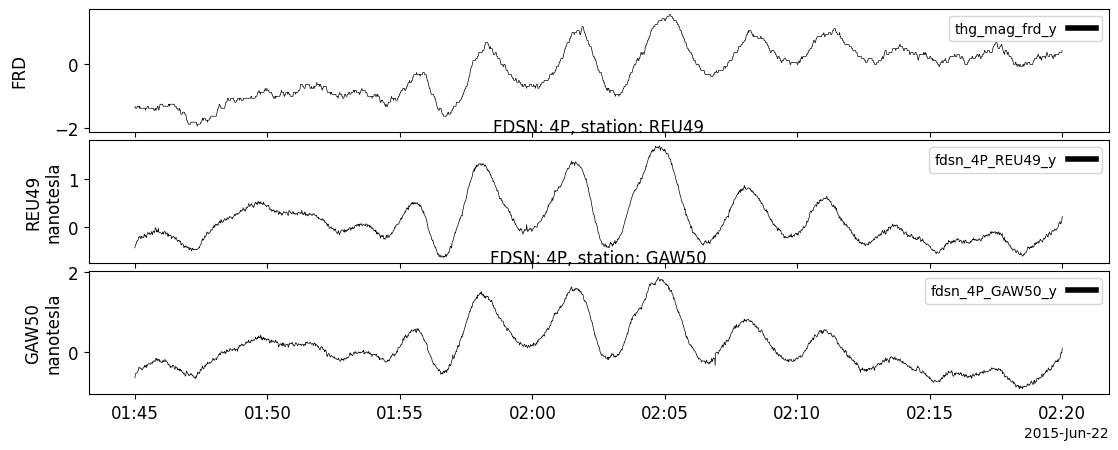

In [1]:
import pyspedas, pytplot
import numpy as np
from pyspedas.mth5.load_fdsn import load_fdsn

date_start = '2015-06-22T01:45:00'
date_end = '2015-06-22T02:20:00'
pyspedas.themis.gmag(sites='frd', trange=[date_start, date_end], time_clip=True)
load_fdsn(network="4P", station="REU49", trange=[date_start, date_end], nowarnings=True)
load_fdsn(network="4P", station="GAW50", trange=[date_start, date_end], nowarnings=True)

tplot_vars = ['thg_mag_frd_y', 'fdsn_4P_REU49_y', 'fdsn_4P_GAW50_y']
for var in tplot_vars:
   pytplot.split_vec(var[:-2])
   time, by = pytplot.get_data(var)  # Unpack tplot variable
   by -= np.median(by)  # Subtract median   
   pytplot.options(var, opt_dict={"legend_names": [var], "ytitle": var.split("_")[2].upper()}) 
   
pytplot.tplot(tplot_vars)